<a href="https://colab.research.google.com/github/Edudeiko/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Evgenii_Dudeiko_DSPT3_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
import numpy as np
from scipy import stats

In [1]:
(1*0.001)/0.08

0.0125

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk * prob_drunk_prior) / prob_positive

In [4]:
prob_drunk_given_positive(0.001, 0.08, 1)

0.0125

In [0]:
drunk = np.random.randint(2, size=1000)
np.mean(drunk)

0.483

In [0]:
bernoulli_drunk = np.random.binomial(n=1, p=.5, size=1000)
np.mean(bernoulli_drunk)

0.524

In [0]:
def bayes_theorem(prior, false_neg, false_pos, num_iter):
  posterior_list = []
  for i in range(num_iter):
    posterior = 0 # write your code here
    posterior_list.append(posterior)
  return posterior_list

In [0]:
cv_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [0]:
import pandas as pd
cv_data = pd.read_csv(cv_data_url)

In [0]:
import numpy as np
from scipy.stats import chisquare
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [8]:
column_headers = ['Class Name', 'handicapped-infants', 
                  'water-project-cost-sharing', 
                  'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
                  'el-salvador-aid', 'religious-groups-in-schools', 
                  'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
                  'mx-missile', 'immigration', 'synfuels-corporation-cutback',
                  'education-spending', 'superfund-right-to-sue', 'crime',
                  'duty-free-exports', 'export-administration-act-south-africa']

df = pd.read_csv(cv_data_url, names=column_headers)
print(df.shape)
df.head()

(435, 17)


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace(to_replace='?', value=np.NaN)
df = df.replace(('y', 'n'), (1, 0))
df = df.fillna(df.mean())
df_rep = df[df['Class Name'] == 'republican']
df_dem = df[df['Class Name'] == 'democrat']

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n-1)
  interval = stderr * t
  return (mean, mean-interval, mean+interval)

In [11]:
confidence_interval(df_rep['education-spending'])

(0.8363242574257426, 0.783845585023213, 0.8888029298282721)

In [14]:
mean_conf_inter,_,_ = stats.bayes_mvs(df_rep['education-spending'], alpha=0.95)
mean_conf_inter

Mean(statistic=0.8363242574257426, minmax=(0.783845585023213, 0.8888029298282721))

In [20]:
confidence_interval(df_dem['education-spending'])

(0.16336633663366334, 0.12150842680968621, 0.20522424645764048)

In [21]:
mean_conf_inter,_,_ = stats.bayes_mvs(df_dem['education-spending'], alpha=0.95)
mean_conf_inter

Mean(statistic=0.16336633663366334, minmax=(0.12150842680968622, 0.20522424645764048))

In [0]:
res_mean, res_var, res_std = stats.bayes_mvs(df_dem['education-spending'], alpha=0.95)

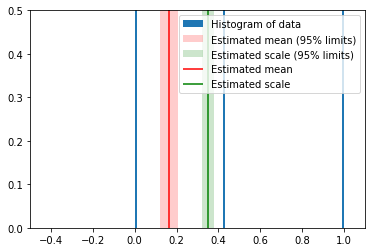

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df_dem['education-spending'], bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
           alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
           label=r'Estimated scale (95% limits)')
ax.legend(fontsize=10)
ax.set_xlim([-0.5, 1.1])
ax.set_ylim([0, 0.5])
plt.show()

In [0]:
#Bayes Theorem

def get_outcomes(sample_space, f_name='', e_name=''):
    outcomes = 0
    for e_k, e_v in sample_space.items():
        if f_name=='' or f_name==e_k:
            for se_k, se_v in e_v.items():
                if e_name!='' and se_k == e_name:
                    outcomes+=se_v
                elif e_name=='':
                    outcomes+=se_v
    return outcomes

def p(sample_space, f_name):
    return get_outcomes(sample_space, f_name) / get_outcomes(sample_space, '', '')

def p_inters(sample_space, f_name, e_name):
    return get_outcomes(sample_space, f_name, e_name) / get_outcomes(sample_space, '', '')

def p_conditional(sample_space, f_name, e_name):
    return p_inters(sample_space, f_name, e_name) / p(sample_space, f_name)

def bayes(sample_space, f, given_e):
    sum = 0;
    for e_k, e_v in sample_space.items():
        sum+=p(sample_space, e_k) * p_conditional(sample_space, e_k, given_e)
    return p(sample_space, f) * p_conditional(sample_space, f, given_e) / sum

sample_space = {'UK':{'Boy':10, 'Girl':20},
                'FR':{'Boy':10, 'Girl':10},
                'CA':{'Boy':10, 'Girl':30}}

print('Probability of being from FR:', p(sample_space, 'FR'))
print('Probability to be French Boy:', p_inters(sample_space, 'FR', 'Boy'))
print('Probability of being a Boy given a person is from FR:', p_conditional(sample_space, 'FR', 'Boy'))
print('Probability to be from France given person is Boy:', bayes(sample_space, 'FR', 'Boy'))

sample_space = {'Grow' :{'Up':160, 'Down':40},
                'Slows':{'Up':30, 'Down':70}}

print('Probability economy is growing when stock is Up:', bayes(sample_space, 'Grow', 'Up'))

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)